# Experiments in frequentist Statistics

##### 2018-10-15 Josep Fortiana

The frequentist way of thinking about statistics relies upon an imagined experiment _(Gedanken experiment):_ 

Assume the operation of observing a data set, $n$ values $x_1,\dots,x_n$, say, can be indefinitely repeated in the same conditions, yielding a large number $N$ of copies of the observed vector $\mathbf{x}=(x_1,\dots,x_n)$.

Then statistical quantities such as bias or variance (quadratic risc) of an estimator, probabilities such as $p$-values for a hypothesis test, or the meaning of a confidence interval are interpreted in terms of this virtual _BIG_ sample.

Of course, such scenario is rarely realistic (except, approximately, in quality control from a production line whose output is a sequence of item batches). 

This is one of the main arguments in support of the Bayesian paradigm.

There is a way, however, of obtaining equally generated samples, namely by simulation, and this is what we will be presently doing in these experiments, designed to understand basic concepts in frequentist Statistics.

### Generating a batch of samples of a r.v.

In order to obtain a sample of a statistic we need many samples, generated according to an equal distribution. Thus we set a batch size, say:

In [3]:
N<-300

Function `X.sample()` allows us to generate a batch of $N$ independent samples, of equal size $n$ and a given distribution. 

In [4]:
X.sample<-function(n=10,N=100,rdist=rnorm,...){
  X<-matrix(rdist(n*N,...),nrow=N)
  return(X)
}

The following line generates a matrix with $N$ rows and $n=120$ columns. Each row will be an $n$-sample of a $\cal{N}(0,1)$ distribution.

In [9]:
n<-120
X<-X.sample(n,N,rdist=rnorm)

Now we plot a histogram of the sample in the third row. In this way we can experiment with the normal and other distributions. Remark (syntax detail): the parameter `rdist` is just the _name_ of the RNG function. 

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
""bw" is not a graphical parameter"

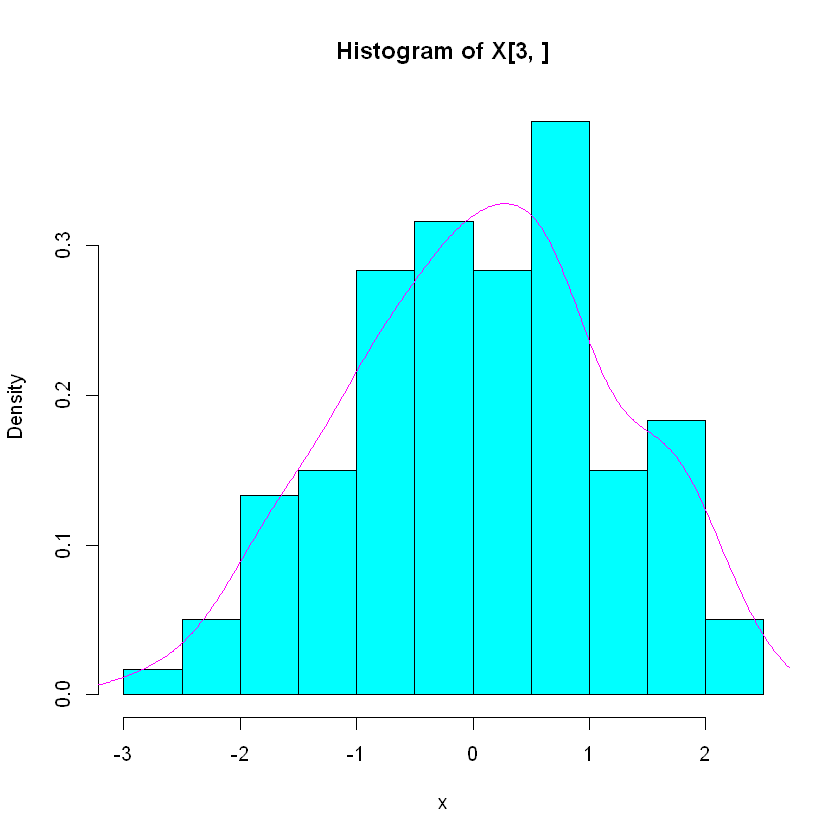

In [7]:
hist(X[3,],freq=FALSE,breaks=15,col="cyan",xlab="x")
#lines (density(X[3,]),bw=0.07, col="magenta")

Note the dots `...` argument to the `X.sample` function. Additional parameters to the `rdist` function can (and must) be passed by name, usinig the `kwd=<value>` syntax, e.g.:

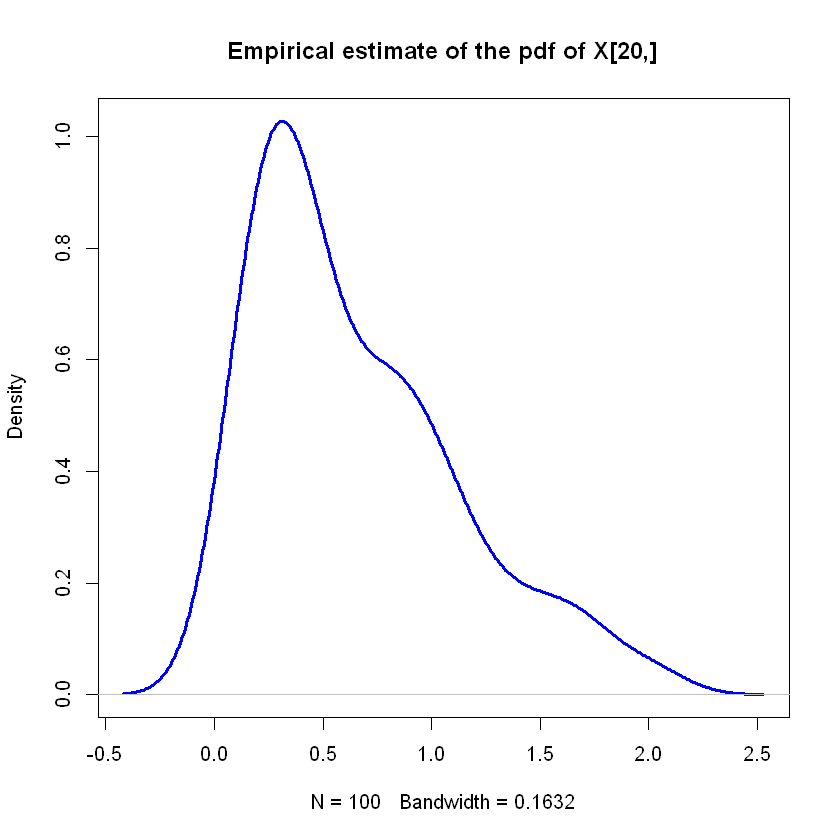

In [5]:
X<-X.sample(n=100,N,rdist=rgamma,shape=2,rate=3)
plot(density(X[20,]),lwd=2.5,col="blue",main="Empirical estimate of the pdf of X[20,]")

### Generating a sample of an estimator _(or any statistic)_

Function `Sample.statistic` takes two parameters, an `[N,n]` matrix `X` such as that generated by `X.sample()` and the name of a statistic, as a function of a vector argument. It returns a vector of length `N`, containing the value of the statistic for each of the `N` samples.

In [6]:
Statistic.sample<-function(X,statistic=mean){
  U<-apply(X,1,statistic)
  return(U)
}

#### Exercise

(1) Generate a batch of `N=300` i.i.d. random $n$-samples from an exponential distribution with $\lambda=3$

(2) Evaluate the vector $s$ of their sums.

(3) Compare the empirical pdf (histogram or a smoothing of it) of the sum with its theoretical pdf, which a $\mbox{Gamma}(\alpha=20,\beta=1/\lambda=1/3)$, 

This vector $s$ is a sample of size $N=300$ of the statistic _sum of an $20$-sample of an $\mbox{Exp}(\lambda=3)$ distribution._ We can check that the sum of $n$ independent copies of an exponential distribution of an equal rate,
$\mbox{Exp}(\lambda=3)$ follows a Gamma distribution, with parameters $\alpha=20$, $\beta=1/\lambda=1/3$ (See the [Wikipedia article](https://en.wikipedia.org/wiki/Gamma_distribution) for properties of the Gamma distribution).

In [7]:
#
# Insert your code here
#
n<-40
N<-500
X<-X.sample(n,N,rdist=rexp,rate=3)
s<-Statistic.sample(X,statistic=sum)
hist(s,freq=FALSE,breaks=15,col="cyan",ylim=c(0,0.20))
s.max<-max(s)
z<-seq(0,s.max,length=600)
lines(z, dgamma, z, shape= 20, scale=1/3)

### Evaluating bias and quadratic error of an estimator

Once we have grasped the fact that a statistic is, indeed, a random object, we understand the problem posed by our intention of using such a random value as an estimate of a parameter which, by definition, is a fixed quantity. The short answer is that we do not and will never hit the target. A more nuanced response, and the crucial idea, is that the goal is not only to propose a candidate	estimate but to obtain, _together with it,_ some quantitative measure of the magnitude and salient features of the deviation from the unknown true value.

To put an example, to use the arithmetic mean as an estimator of $\lambda$, the _rate_ parameter in an exponential distribution, is a misguided decision. 

Why? 

Because we know that the arithmetic mean of an i.i.d. random sample tends to approach the expectation of the r.v. which, in the case of an exponential distribution, is $1/\lambda$. 

This is a **systematic error**. _Bias_ is a measure of such a systematic error.

For instance:

In [9]:
s<-Statistic.sample(X,statistic=mean)

Values of `s` are random, distributed as we can see:

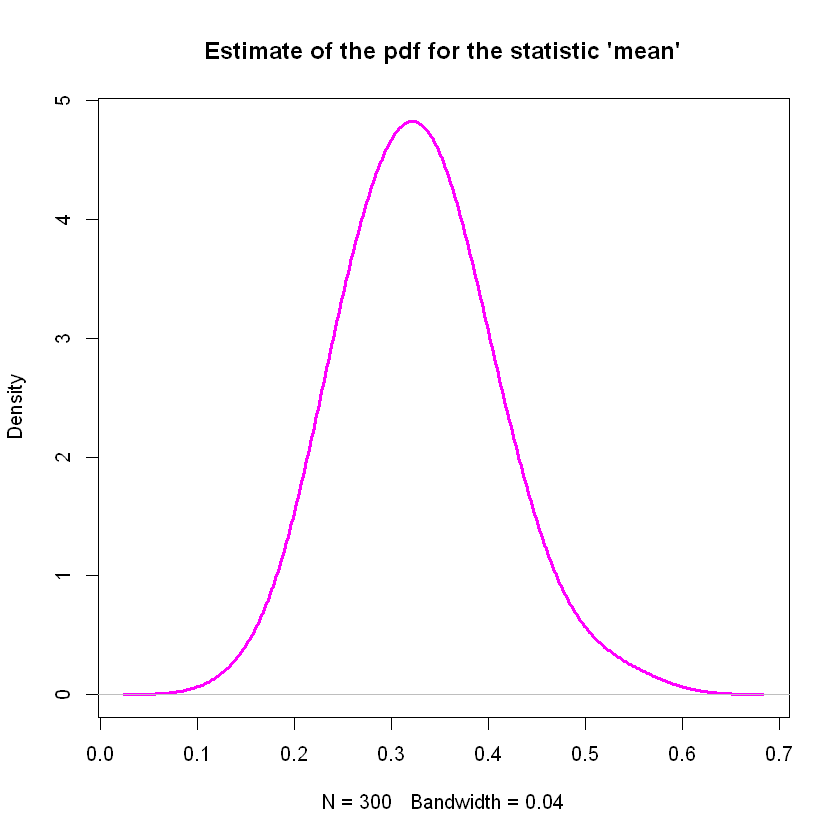

In [10]:
plot(density(s,bw=0.04),lwd=2.5,col="magenta",main="Estimate of the pdf for the statistic 'mean'")

Additionally, we can see they are distributed around $1/\lambda$.

In [11]:
round(1/lambda,3)

[1] 0.333

### Summary of formulas for a normal sample

Assume we have an $n$-sample:

$$
    X_{1},\dots,X_{n}\quad\text{iid }\sim\mbox{N}(\mu,\sigma^{2}).
$$

Empirical mean and standardized empirical mean:

$$
    \overline{X}=\dfrac{1}{n}\,\displaystyle\sum_{i=1}^{n}X_{i}\sim\mbox{N}(\mu,\dfrac{\sigma^{2}}{n}),\qquad
    Z=\dfrac{\overline{X}-\mu}{\sigma}\,\sqrt{n}\sim\mbox{N}(0,1).
$$

Mean quadratic deviation with respect to $\mu$: 

$$
    S^{2}(\mu)=\dfrac{1}{n}\,\displaystyle\sum_{i=1}^{n}(X_{i}-\mu)^{2}.
$$

Empirical variance:

$$
    S^{2}=S^{2}(\overline{X})=\dfrac{1}{n}\,\displaystyle\sum_{i=1}^{n}(X_{i}-\overline{X})^{2}.
$$

Empirical corrected variance:

$$
    \widetilde{S}^{2}=\dfrac{1}{n-1}\,\displaystyle\sum_{i=1}^{n}(X_{i}-\overline{X})^{2}
    =\dfrac{n}{n-1}\,S^{2}.
$$ 

Standard deviations corresponding to the above quadratic quantities:

$$
    S(\mu)=\sqrt{S^{2}(\mu)},\qquad S=\sqrt{S^{2}},\qquad \widetilde{S}=\sqrt{\widetilde{S}^{2}}.
$$

Standardized sums of squares: 

$$
    Q(\mu)=\dfrac{n\,S^{2}(\mu)}{\sigma^{2}}\sim\chi^{2}(n), \qquad  
    Q\equiv Q(\overline{X})=\dfrac{n\,S^{2}}{\sigma^{2}}\sim\chi^{2}(n-1).
$$ 

The ratio:

$$
    T=\dfrac{Z}{\sqrt{Q/(n-1)}}=\dfrac{\overline{X}-\mu}{S}\,\sqrt{n-1}
    =\dfrac{\overline{X}-\mu}{\strut\widetilde{S}}\,\sqrt{n}\sim t(n-1).
$$


### Confidence interval for $\mu$, with a known $\sigma$

Pivotal function: the standardized empirical mean, \(Z\). 

Given a confidence level $\gamma$, we compute $a$ such that $P\left(|Z|<a\right)=\gamma$. For instance, when 
$\gamma=0.95$,

In [12]:
a<-qnorm(0.975)     # Why 0.975?
round(a,4)

[1] 1.96

Given $n$ and $\sigma$, we perform the pivoting, isolating $\mu$ in:

$$
    0.95=P\left(-a<\dfrac{\overline{X}_{n}-\mu}{\sigma}\,\sqrt{n}<a\right)
    =P\left(\overline{X}_{n}-a\,\dfrac{\sigma}{\sqrt{n}} <\mu
    <\overline{X}_{n}+a\,\dfrac{\sigma}{\sqrt{n}}\right).
$$
    For example, if $\sigma=2$, $n=10$, we obtain:

In [13]:
sigma<-2
n<-10
d<-qnorm(0.975)*sigma/sqrt(n)
round(d,4)

[1] 1.2396

Thus the interval is $\overline{X}_{n}\pm d$.

We generate a random normal sample with $n=10$, $\mu=4$, $\sigma=2$, we evaluate its empirical mean and then the
confidence interval for $\mu$, with confidence coefficient $\gamma=0.95$:

In [14]:
x<-rnorm(n,4,2)
m<-mean(x)
round(m,4)
I<-c(m-d,m+d)
round(I,4)

[1] 4.1878

[1] 2.9482 5.4274

To understand the frequentist interpretation of the concept of confidence interval and, within it, the meaning of $\gamma$, we repeat many times this experiment. 

Of course this action is possible only within a simulation framework, never in real-life situations. Then,

#### Frequentist interpretation: 

The relative frequency of occurrence of the event:

$$
\mskip-600mu\text{The interval $I$ contains $\mu$}
$$

will be close to the theoretical confidence coefficient $\gamma$. Note that in the frequentist interpretation $I$ is random and $\mu$ is fixed.

To visualize this interpretation, we generate $N=1000$ independent normal random samples with $n=10$, $\mu=4$, $\sigma=2$, setting up a matrix with $N$ rows and $n$ columns, in which each row represents a sample:

In [15]:
N<-1000 # Later on you can test other N values
n<-10
mu<-4
sigma<-2
X<-rnorm(N*n,mu,sigma)
dim(X)<-c(N,n)

We compute the vector `M` with the $N$ empirical means and, from it, the vectors `A` and `B` containing the lower and upper limits for the confidence interval, evaluated for each of the $N$ samples.

In [16]:
M<-apply(X,1,mean)
d<-qnorm(0.975)*sigma/sqrt(n)
round(d,4)
A<-M-d
B<-M+d

[1] 1.2396

For each interval we check whether the theoretical value, $\mu=4$ lies within the interval.

In [17]:
u<-(A<mu) & (mu<B)
Empirical.confidence<-sum(u)/N
round(Empirical.confidence,3)

[1] 0.946

The result  `u` is a Boolean vector, which takes the value `TRUE`, i.e., numerically $1$,  when the interval contains $4$ and `FALSE`, numerically $0$, otherwise. 

The proportion `Empirical.confidence` of `TRUE` values in `u` is close to the proposed $\gamma=0.95$.

### Confidence interval for $\mu$, with an unknown $\sigma$

Given a confidence level $\gamma$, we compute $a$ such that $P\left(|T_{n}|<a\right)=\gamma$. For instance, when $\gamma=0.90$, if $n=10$ as above, with distribution $t(9)$ (Student's $t$ with $9$ degrees of freedom),

In [18]:
gamma<-0.90
a<-qt((1+gamma)/2,n-1)  # Why (1+gamma)/2 ?
round(a,3)

[1] 1.833

Computing as in the above example,

$$
    \mskip-400mu 0.90=P\left(-a<\dfrac{\overline{X}_{n}-\mu}{\widetilde{S}_{n}}\,\sqrt{n}<a\right)
    =P\left(\overline{X}_{n}-a\,\dfrac{\widetilde{S}_{n}}{\sqrt{n}}<\mu
    <\overline{X}_{n}+a\,\dfrac{\widetilde{S}_{n}}{\sqrt{n}}\right)
$$

In [19]:
d<-qt((1+gamma)/2,n-1)*sd(x)/sqrt(n)
round(d,3)

[1] 0.992

Thus, for the above sample:

In [20]:
I<-c(m-d,m+d)
round(I,3)

[1] 3.195 5.180

Actually, the (loaded by default) `stats` package in `R` provides a way to do this directly. The function:

In [21]:
t.test(x, conf.level=0.90)


	One Sample t-test

data:  x
t = 7.7351, df = 9, p-value = 2.894e-05
alternative hypothesis: true mean is not equal to 0
90 percent confidence interval:
 3.195338 5.180237
sample estimates:
mean of x 
 4.187787 


returns the same result we just obtained. The default confidence level `conf.level` for `t.test` is $0.95$. Here we wanted $\gamma=0.90$, so we entered it explicitly.

#### Exercise

Simulate the frequentist interpretation of a confidence interval with confidence coefficient $\gamma$ for $\mu$ in a normal $n$-sample with an unknown $\sigma$.

Evaluate the empirical confidence and comppare it with the given theoretical $\gamma$.

In [22]:
#
# Insert here your code
#

### Confidence interval for a proportion

Assume we have performed $n$ independent repetitions of a binary experiment where, in each repetition, occurrence of an event \(A\) is registered. The indicators:

$$
    X_{1},\dots,X_{n}\quad\text{i.i.d. }\sim\mbox{Bernoulli}(p),
$$

where $p=P(A)$. The sum of the $X_{i}$, the absolute frequency of $A$ occurrence, is a binomial r.v.:

$$
    N=\sum_{i=1}^{n}X_{i}\sim\mbox{B}(n,p),\qquad   \mbox{E}(N)=n\,p,\quad\operatorname{var}(N)=n\,p\,(1-p).
$$

From the Central Limit Theorem, for a sufficiently large $n$,
    
$$
    Z=\dfrac{N-n\,p}{\sqrt{n\,p\,(1-p)}}
$$
    
is approximately a standard normal r.v. $\sim\mbox{N}(0,1)$. As a function of the relative frequency $f=N/n=\overline{X}$,

$$
    Z=\dfrac{f-p}{\sqrt{p\,(1-p)}}\,\sqrt{n}.
$$

It is possible to obtain an _approximate_ confidence interval for the proportion $p$, in terms of $f$ and $n$, following the procedure described in the above Section, provided that in the $\sqrt{p\,(1-p)}$ we substitute the
empirical probability, i.e., the relative frequency $f$, for the probability $p$.

#### Exercise

Write code to compute a confidence interval of a given confidence level $gamma$ for the probability $\theta$ of an event $A$ from the proportion (relative frequency) of $A$ occurrence in a sequence of $n$ independent repetitions of a binary experiment where, in each repetition, occurrence of either $A$ or its complementary event $A^c$ is registered.

In [23]:
#
#    Write here your code
#